# Groupby Example

In [1]:
import pandas as pd
from IPython.display import display

In [2]:
mlb=pd.read_csv('MLB_2014_2015.csv')
# take a look at the shape of the dataset
print(mlb.shape)
# and the first few columns
display(mlb.head())

(60, 14)


,Tm,Year,lg,R,2B,3B,HR,RBI,SB,BB,BA,OBP,SLG,OPS
0,BAL,2015,AL,713,246,20,217,686,44,418,0.250,0.307,0.421,0.728
1,BOS,2015,AL,748,294,33,161,706,71,478,0.265,0.325,0.415,0.740
2,CHW,2015,AL,622,260,27,136,595,68,404,0.250,0.306,0.380,0.686
3,CLE,2015,AL,669,303,29,141,640,86,533,0.256,0.325,0.401,0.725
4,DET,2015,AL,689,289,49,151,660,83,455,0.270,0.328,0.420,0.748


The groupby function is one of the most important functions in data analysis.  It groups rows of a table by common values of a collumn.  Here we group by 'Year'.

In [3]:
year_group=mlb.groupby('Year')

In [4]:
print (type(year_group))
print (len(year_group))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
2


Groupby returns a 'DataFrameGroupBy' object.  Before using the groups we need 'aggregate' the groups by a method such as 'count' or 'mean'. Below we group by mean.

In [5]:
help(year_group.mean)

Help on method mean in module pandas.core.groupby.groupby:

mean(numeric_only: 'bool' = False, engine: 'str' = 'cython', engine_kwargs: 'dict[str, bool] | None' = None) method of pandas.core.groupby.generic.DataFrameGroupBy instance
    Compute mean of groups, excluding missing values.
    
    Parameters
    ----------
    numeric_only : bool, default False
        Include only float, int, boolean columns.
    
        .. versionchanged:: 2.0.0
    
            numeric_only no longer accepts ``None`` and defaults to ``False``.
    
    engine : str, default None
        * ``'cython'`` : Runs the operation through C-extensions from cython.
        * ``'numba'`` : Runs the operation through JIT compiled code from numba.
        * ``None`` : Defaults to ``'cython'`` or globally setting
          ``compute.use_numba``
    
        .. versionadded:: 1.4.0
    
    engine_kwargs : dict, default None
        * For ``'cython'`` engine, there are no accepted ``engine_kwargs``
        * For ``'

In [6]:
by_year=year_group.mean(numeric_only=True)
print (type(by_year))
print
print (by_year.head())

<class 'pandas.core.frame.DataFrame'>
               R          2B    3B          HR         RBI         SB  \
Year                                                                    
2014  658.700000  271.233333  28.3  139.533333  624.833333  92.133333   
2015  688.233333  274.733333  31.3  163.633333  655.000000  83.500000   

              BB      BA       OBP       SLG       OPS  
Year                                                    
2014  467.333333  0.2511  0.313667  0.386200  0.699733  
2015  469.100000  0.2544  0.316667  0.404567  0.721267  


Below we group by max

In [7]:
by_year_max=year_group.max()
print (type(by_year_max))
print
print (by_year_max.head())

<class 'pandas.core.frame.DataFrame'>
       Tm  lg    R   2B  3B   HR  RBI   SB   BB     BA    OBP    SLG    OPS
Year                                                                       
2014  WSN  NL  773  325  47  211  731  153  586  0.277  0.333  0.445  0.772
2015  WSN  NL  891  308  49  232  852  134  570  0.270  0.340  0.457  0.797


Now we have a dataframe for which we can call the ussual plotting functions

<Axes: xlabel='Year'>

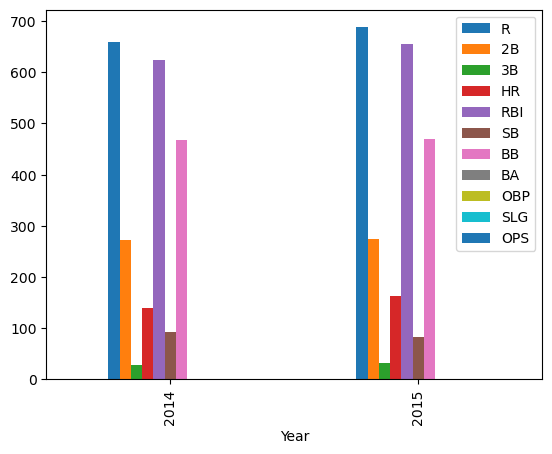

In [8]:
%matplotlib inline

by_year.plot.bar()

<Axes: xlabel='Year'>

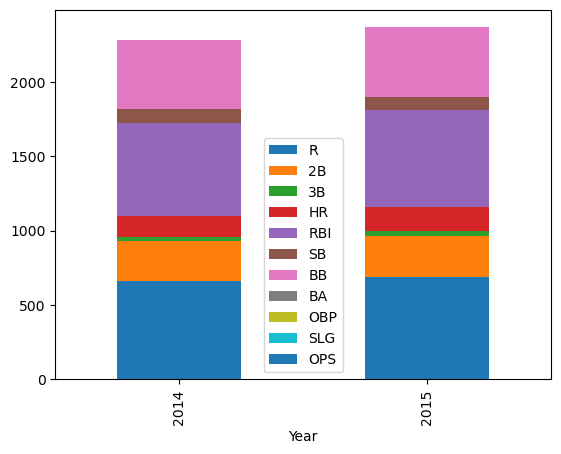

In [9]:
by_year.plot.bar(stacked=True)